In [11]:
include("./main_parser.jl")

draw_hg (generic function with 1 method)

In [2]:
using PyCall, BSON, DecisionTree, Random

In [3]:
BSON.@load "models/model_rf.bson" rf

spacy = pyimport("spacy")

nlp = spacy.load("en_core_web_lg")

PyObject <spacy.lang.en.English object at 0x7fb66ace23d0>

In [12]:
doc = nlp("Dollar climbs as inflation builds case for higher rates")
hg, atoms_tokens = beta(patterns, doc, alpha(doc, rf), true)

Atoms tokens dict is: Dict{Vector{String}, Vector{PyObject}}(["C", "P", "T", "C", "P", "C", "B", "C"] => [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject case, PyObject for, PyObject [higher, rates]], ["C", "P", "T", "C", "P", "C", "B", "M", "C"] => [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject case, PyObject for, PyObject higher, PyObject rates])
Atoms depths are: ["C", "P", "T", "C", "P", "C", "B", "C"]
Atoms tokens dict is: Dict{Vector{String}, Vector{PyObject}}(["C", "P", "T", "C", "P", "C", "B", "C"] => [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject case, PyObject for, PyObject [higher, rates]], ["C", "P", "T", "C", "P", "C"] => [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject [case, for, [higher, rates]]], ["C", "P", "T", "C", "P", "C", "B", "M", "C"] => [PyObject Dollar, PyObject climbs, PyObject 

(Union{Nothing, Float64}[nothing nothing … nothing 1.0; nothing nothing … nothing 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], Dict{Vector{String}, Vector{PyObject}}(["C", "P", "T", "C", "P", "C", "B", "C"] => [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject case, PyObject for, PyObject [higher, rates]], ["R"] => [PyObject [Dollar, climbs, [as, [inflation, builds, [case, for, [higher, rates]]]]]], ["C", "P", "T", "R"] => [PyObject Dollar, PyObject climbs, PyObject as, PyObject [inflation, builds, [case, for, [higher, rates]]]], ["C", "P", "S"] => [PyObject Dollar, PyObject climbs, PyObject [as, [inflation, builds, [case, for, [higher, rates]]]]], ["C", "P", "T", "C", "P", "C"] => [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject [case, for, [higher, rates]]], ["C", "P", "T", "C", "P", "C", "B", "M", "C"] => [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyOb

In [13]:
atoms_tokens[["C", "P", "S"]]

3-element Vector{PyObject}:
 PyObject Dollar
 PyObject climbs
 PyObject [as, [inflation, builds, [case, for, [higher, rates]]]]

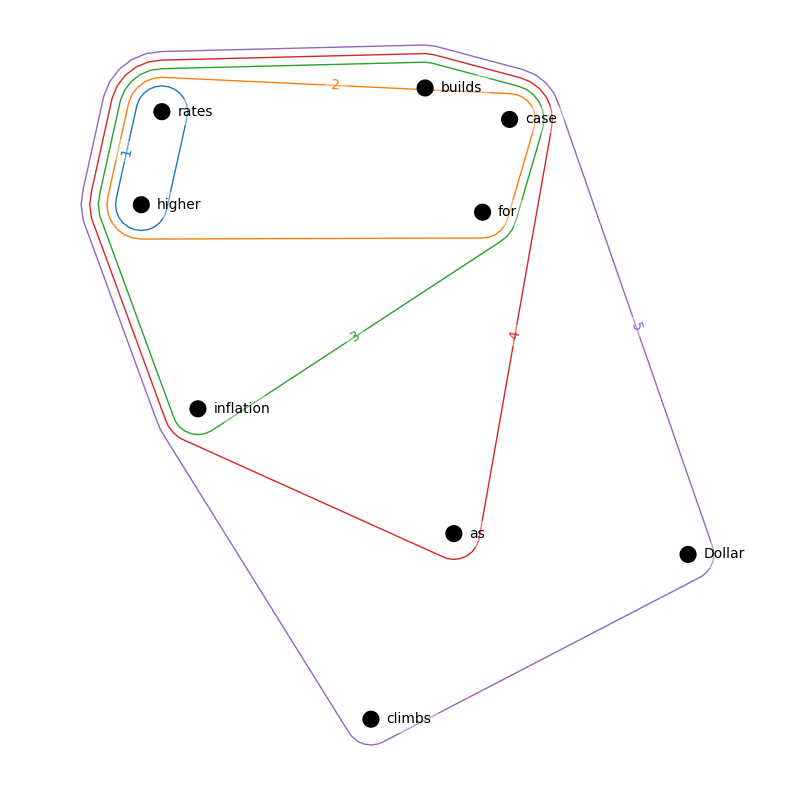

Dict(5 => "builds", 4 => "inflation", 6 => "case", 7 => "for", 2 => "climbs", 9 => "rates", 8 => "higher", 3 => "as", 1 => "Dollar")

In [9]:
draw_hg(hg, doc)

In [71]:
doc = nlp("Dollar edges down as traders await US data")
hg = beta(patterns, doc, alpha(doc, rf), true)

Any[[7, 8]][7, 8]Atoms tokens dict is: PyObject[PyObject Dollar, PyObject edges, PyObject [down, as], PyObject traders, PyObject await, PyObject [US, data]]
Atoms tokens dict is: PyObject[PyObject Dollar, PyObject edges, PyObject [down, as], PyObject [traders, await], PyObject [US, data]]
Atoms tokens dict is: PyObject[PyObject Dollar, PyObject edges, PyObject [[down, as], [traders, await]], PyObject [US, data]]
Atoms tokens dict is: PyObject[PyObject [Dollar, edges, [[down, as], [traders, await]]], PyObject [US, data]]
Atoms tokens dict is: PyObject[PyObject [[Dollar, edges, [[down, as], [traders, await]]], [US, data]]]


8×6 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing   nothing   nothing   nothing  1.0       1.0
  nothing   nothing   nothing   nothing  1.0       1.0
  nothing  1.0        nothing  1.0       1.0       1.0
  nothing  1.0        nothing  1.0       1.0       1.0
  nothing   nothing  1.0       1.0       1.0       1.0
  nothing   nothing  1.0       1.0       1.0       1.0
 1.0        nothing   nothing   nothing   nothing  1.0
 1.0        nothing   nothing   nothing   nothing  1.0

In [45]:
doc = nlp("Dollar rebounds after improving jobs")
hg = beta(patterns, doc, alpha(doc, rf), true)

Actual hypergraph: Union{Nothing, Float64}[nothing; nothing; nothing; 1.0; 1.0]
Atoms depths are: Vector{T} where T[["C", "P", "T", "R"], [1, 0, 1, 0]]
Actual hypergraph: Union{Nothing, Float64}[nothing nothing; nothing nothing; nothing 1.0; 1.0 1.0; 1.0 1.0]
Atoms depths are: Vector{T} where T[["C", "P", "S"], [1, 0, 0]]
Actual hypergraph: Union{Nothing, Float64}[nothing nothing 1.0; nothing nothing 1.0; nothing 1.0 1.0; 1.0 1.0 1.0; 1.0 1.0 1.0]
Atoms depths are: Vector{T} where T[["R"], [0]]


5×3 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing   nothing  1.0
  nothing   nothing  1.0
  nothing  1.0       1.0
 1.0       1.0       1.0
 1.0       1.0       1.0

In [49]:
doc = nlp("Dollar Weakens as Risk Appetite Returns Ahead of Retail Sales Data")
hg = beta(patterns, doc, alpha(doc, rf), true)

Any[[9, 10], [10, 11]][9, 10][10, 11]Actual hypergraph: Union{Nothing, Float64}[nothing nothing nothing; nothing nothing nothing; nothing nothing nothing; nothing nothing 1.0; nothing nothing 1.0; nothing nothing nothing; nothing nothing nothing; nothing nothing nothing; 1.0 nothing nothing; 1.0 1.0 nothing; nothing 1.0 nothing]
Atoms depths are: Vector{T} where T[["C", "P", "T", "C", "C", "M", "B", "B"], [1, 0, 1, 0, 2, 1, 2, 5]]
Actual hypergraph: Union{Nothing, Float64}[nothing nothing nothing nothing; nothing nothing nothing nothing; nothing nothing nothing nothing; nothing nothing 1.0 nothing; nothing nothing 1.0 nothing; nothing nothing nothing nothing; nothing nothing nothing 1.0; nothing nothing nothing 1.0; 1.0 nothing nothing nothing; 1.0 1.0 nothing nothing; nothing 1.0 nothing nothing]
Atoms depths are: Vector{T} where T[["C", "P", "T", "C", "C", "B", "B"], [1, 0, 1, 0, 2, 0, 5]]
Actual hypergraph: Union{Nothing, Float64}[nothing nothing nothing nothing nothing; nothing not

11×8 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing   nothing   nothing   nothing   nothing   nothing  1.0       1.0
  nothing   nothing   nothing   nothing   nothing   nothing  1.0       1.0
  nothing   nothing   nothing   nothing   nothing  1.0       1.0       1.0
  nothing   nothing  1.0        nothing  1.0       1.0       1.0       1.0
  nothing   nothing  1.0        nothing  1.0       1.0       1.0       1.0
  nothing   nothing   nothing   nothing  1.0       1.0       1.0       1.0
  nothing   nothing   nothing  1.0       1.0       1.0       1.0       1.0
  nothing   nothing   nothing  1.0       1.0       1.0       1.0       1.0
 1.0        nothing   nothing   nothing   nothing   nothing   nothing  1.0
 1.0       1.0        nothing   nothing   nothing   nothing   nothing  1.0
  nothing  1.0        nothing   nothing   nothing   nothing   nothing  1.0

In [50]:
x = ["a", "b", "c"]
x[[1,2]]

2-element Vector{String}:
 "a"
 "b"